In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
basedir = "/Users/bono/Desktop/gm2FieldAnalysis/MuonConvolution/"

In [4]:
path = basedir + 'synthesis/data/60H_field_ctag_dqm.pkl'
df_old = pd.read_pickle(path)
df_old

DateTime        D        eD        NQ       eNQ  \
run   subrun                                                              
15921 0      2018-04-22 13:14:02  841.735  0.079075  0.032789  0.096987   
      0      2018-04-22 13:14:04  841.706  0.079075  0.060667  0.096987   
      0      2018-04-22 13:14:06  841.685  0.079075  0.054613  0.096987   
      0      2018-04-22 13:14:08  841.714  0.079075  0.044995  0.096987   
      0      2018-04-22 13:14:10  841.708  0.079075  0.055440  0.096987   
...                          ...      ...       ...       ...       ...   
15988 206    2018-04-24 23:59:16  841.007  0.087315 -0.310075  0.100196   
      206    2018-04-24 23:59:18  840.980  0.087315 -0.287574  0.100196   
      206    2018-04-24 23:59:20  841.001  0.087315 -0.290094  0.100196   
      206    2018-04-24 23:59:22  840.987  0.087315 -0.305687  0.100196   
      206    2018-04-24 23:59:24  841.058  0.087315 -0.337580  0.100196   

                    SQ       eSQ       NS       eNS          start_time  ...  \
run   subrun                                                             ...   
15921 0       0.169870  0.030298 -1.15897  0.035181 2018-04-22 13:14:00  ...   
      0       0.175534  0.030298 -1.16613  0.035181 2018-04-22 13:14:00  ...   
      0       0.173558  0.030298 -1.17401  0.035181 2018-04-22 13:14:00  ...   
      0       0.173786  0.030298 -1.16228  0.035181 2018-04-22 13:14:00  ...   
      0       0.173864  0.030298 -1.16585  0.035181 2018-04-22 13:14:00  ...   
...                ...       ...      ...       ...                 ...  ...   
15988 206     0.345685  0.031365 -1.24907  0.037755 2018-04-24 23:59:10  ...   
      206     0.342905  0.031365 -1.25875  0.037755 2018-04-24 23:59:10  ...   
      206     0.342208  0.031365 -1.25413  0.037755 2018-04-24 23:59:10  ...   
      206     0.342131  0.031365 -1.25930  0.037755 2018-04-24 23:59:10  ...   
      206     0.344414  0.031365 -1.23384  0.037755 2018-04-24 23:59:10  ...   

             field_ok  trolley_period field_period ctags_loose_ok  \
run   subrun                                                        
15921 0          True             0.0          1.0          False   
      0          True             0.0          1.0          False   
      0          True             0.0          1.0          False   
      0          True             0.0          1.0          False   
      0          True             0.0          1.0          False   
...               ...             ...          ...            ...   
15988 206        True             0.0         11.0           True   
      206        True             0.0         11.0           True   
      206        True             0.0         11.0           True   
      206        True             0.0         11.0           True   
      206        True             0.0         11.0           True   

              quad_loose_ok  ctags_repeat_ok  losses_repeat_ok  \
run   subrun                                                     
15921 0                None             None              None   
      0                None             None              None   
      0                None             None              None   
      0                None             None              None   
      0                None             None              None   
...                     ...              ...               ...   
15988 206              None             None              None   
      206              None             None              None   
      206              None             None              None   
      206              None             None              None   
      206              None             None              None   

              fillcuts_repeat_ok           poor_time  poor_ctags  
run   subrun                                                      
15921 0                     None 2018-04-22 13:14:26       231.5  
      0                     None 2018-04-22 13:14

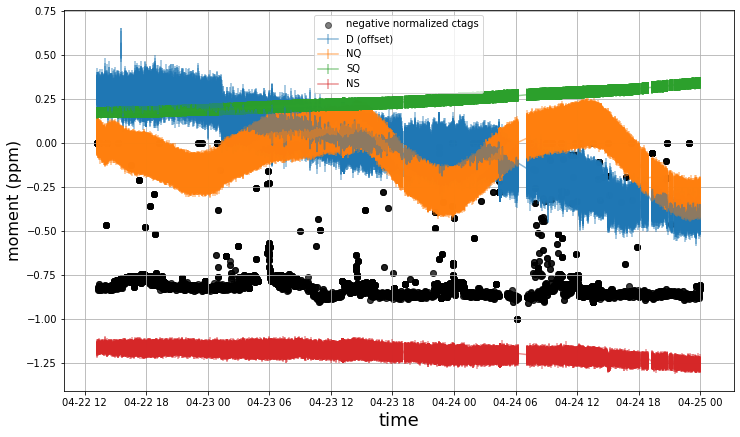

In [8]:
df = df_old.copy()
#for plotting together, subtract the dipole average from the dipole
mean = df['D'].mean()
df['Doff'] = df['D'] - mean
ctag_mean = df['ctags'].max()
df['ctags_norm'] = df['ctags']/ctag_mean

#plot the moments together
fig = plt.figure(figsize=(12,7))
plt.errorbar(df['DateTime'], df['Doff'], 
             yerr=df['eD'], label='D (offset)',alpha=0.5)
plt.errorbar(df['DateTime'], df['NQ'], 
             yerr=df['eNQ'], label='NQ',alpha=0.5)
plt.errorbar(df['DateTime'], df['SQ'],
             yerr=df['eSQ'], label='SQ',alpha=0.5)
plt.errorbar(df['DateTime'], df['NS'], 
             yerr=df['eNS'], label='NS',alpha=0.5)
plt.scatter(df['start_time'], -df['ctags_norm'], 
            label='negative normalized ctags',alpha=0.5,color='black')

plt.grid()
plt.xlabel('time', fontsize=18)
plt.ylabel('moment (ppm)', fontsize=16)
plt.legend()

plt.show()

In [6]:
path = basedir + 'field_info/data/'
path = path + '60Hr_Average_Comparison_all_3956_3997_norescut_NoAvg.pkl'
df_new = pd.read_pickle(path)
df_new

DateTime        D        eD        NQ       eNQ  \
run   subrun                                                              
15921 0      2018-04-22 13:14:00  841.706  0.097905 -0.069362  0.104364   
      0      2018-04-22 13:14:02  841.693  0.097905 -0.055040  0.104364   
      0      2018-04-22 13:14:04  841.657  0.097905 -0.065431  0.104364   
      0      2018-04-22 13:14:06  841.735  0.097905 -0.065005  0.104364   
      0      2018-04-22 13:14:08  841.676  0.097905 -0.051436  0.104364   
...                          ...      ...       ...       ...       ...   
15991 149    2018-04-25 02:00:26  840.847  0.046195  0.204089  0.087159   
      149    2018-04-25 02:00:28  840.842  0.046195  0.221452  0.087159   
      149    2018-04-25 02:00:30  840.865  0.046195  0.186304  0.087159   
      149    2018-04-25 02:00:32  840.842  0.046195  0.187187  0.087159   
      149    2018-04-25 02:00:34  840.827  0.046195  0.204910  0.087159   

                    SQ       eSQ       NS       eNS  ctags  \
run   subrun                                                 
15921 0       0.179143  0.031806 -1.14899  0.040042      0   
      0       0.179399  0.031806 -1.15387  0.040042      0   
      0       0.178369  0.031806 -1.16658  0.040042      0   
      0       0.176956  0.031806 -1.14100  0.040042      0   
      0       0.179627  0.031806 -1.16408  0.040042      0   
...                ...       ...      ...       ...    ...   
15991 149     0.370243  0.028862 -1.26263  0.028667  20184   
      149     0.372139  0.028862 -1.26311  0.028667  20184   
      149     0.373239  0.028862 -1.25374  0.028667  20184   
      149     0.372619  0.028862 -1.26633  0.028667  20184   
      149     0.372244  0.028862 -1.26974  0.028667  20184   

                      start_time            end_time  poor_ctags  
run   subrun                                                      
15921 0      2018-04-22 13:14:00 2018-04-22 13:14:34       231.5  
      0      2018-04-22 13:14:00 2018-04-22 13:14:34       231.5  
      0      2018-04-22 13:14:00 2018-04-22 13:14:34       231.5  
      0      2018-04-22 13:14:00 2018-04-22 13:14:34       231.5  
      0      2018-04-22 13:14:00 2018-04-22 13:14:34       231.5  
...                          ...                 ...         ...  
15991 149    2018-04-25 02:00:18 2018-04-25 02:00:34       514.8  
      149    2018-04-25 02:00:18 2018-04-25 02:00:34       514.8  
      149    2018-04-25 02:00:18 2018-04-25 02:00:34       514.8  
      149    2018-04-25 02:00:18 2018-04-25 02:00:34       514.8  
      149    2018-04-25 02:00:18 2018-04-25 02:00:34       514.8  

[23645 rows x 13 columns]

/usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


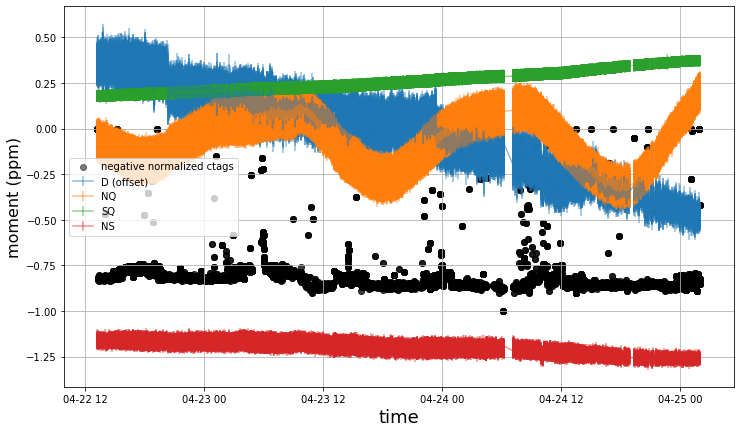

In [7]:
df = df_new.copy()
#for plotting together, subtract the dipole average from the dipole
mean = df['D'].mean()
df['Doff'] = df['D'] - mean
ctag_mean = df['ctags'].max()
df['ctags_norm'] = df['ctags']/ctag_mean

#plot the moments together
fig = plt.figure(figsize=(12,7))
plt.errorbar(df['DateTime'], df['Doff'], 
             yerr=df['eD'], label='D (offset)',alpha=0.5)
plt.errorbar(df['DateTime'], df['NQ'], 
             yerr=df['eNQ'], label='NQ',alpha=0.5)
plt.errorbar(df['DateTime'], df['SQ'],
             yerr=df['eSQ'], label='SQ',alpha=0.5)
plt.errorbar(df['DateTime'], df['NS'], 
             yerr=df['eNS'], label='NS',alpha=0.5)
plt.scatter(df['start_time'], -df['ctags_norm'], 
            label='negative normalized ctags',alpha=0.5,color='black')

plt.grid()
plt.xlabel('time', fontsize=18)
plt.ylabel('moment (ppm)', fontsize=16)
plt.legend()

plt.show()